In [20]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# Heart Failure Prediction

**Reference**
- [Heart Fail:Analysis and Quick-prediction (NAYAN SAKHIYA)](https://www.kaggle.com/code/nayansakhiya/heart-fail-analysis-and-quick-prediction)

## Import Libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from IPython.display import display, HTML
import warnings
import plotly.graph_objects as go

%matplotlib inline
%config InlineBackend.figure_format='retina'

warnings.filterwarnings("ignore")

### Features
- **age** / continuous / Age of patient
- **anaemia** / integer / No(=0), Yes(=1)
- **creatinine_phosphokinase** / integer
- **diabetes** / integer / No(=0), Yes(=1)
- **ejection_fraction** / integer / %
- **high_blood_pressure** / integer / No(=0), Yes(=1)
- **platelets** / continuous / kiloplateletes/mL
- **serum_creatinine** / continuous / mg/dL
- **serum_sodium** / integer / mEq/L
- **sex** / integer / Male(=1), Female(=0)
- **smoking** / integer / No(=0), Yes(=1)
- **time** / integer / days
- **DEATH_EVENT** / integer / No(=0), Yes(=1)

$ \rightarrow \textbf{'Time' and 'DEATH_EVENT' data are assumed to be correlated}$  
- If the patient **dies**, the observation period(**'time'** data) ends

In [22]:
df = pd.read_csv('./heart_failure_clinical_records_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


$\rightarrow \textbf{There is no missing Value}$

In [23]:
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


$ \rightarrow \textbf{6 Categorical Feature, 7 Numerical Features}$

In [24]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


$ \rightarrow \textbf{A few outliers in the numerical data}$  

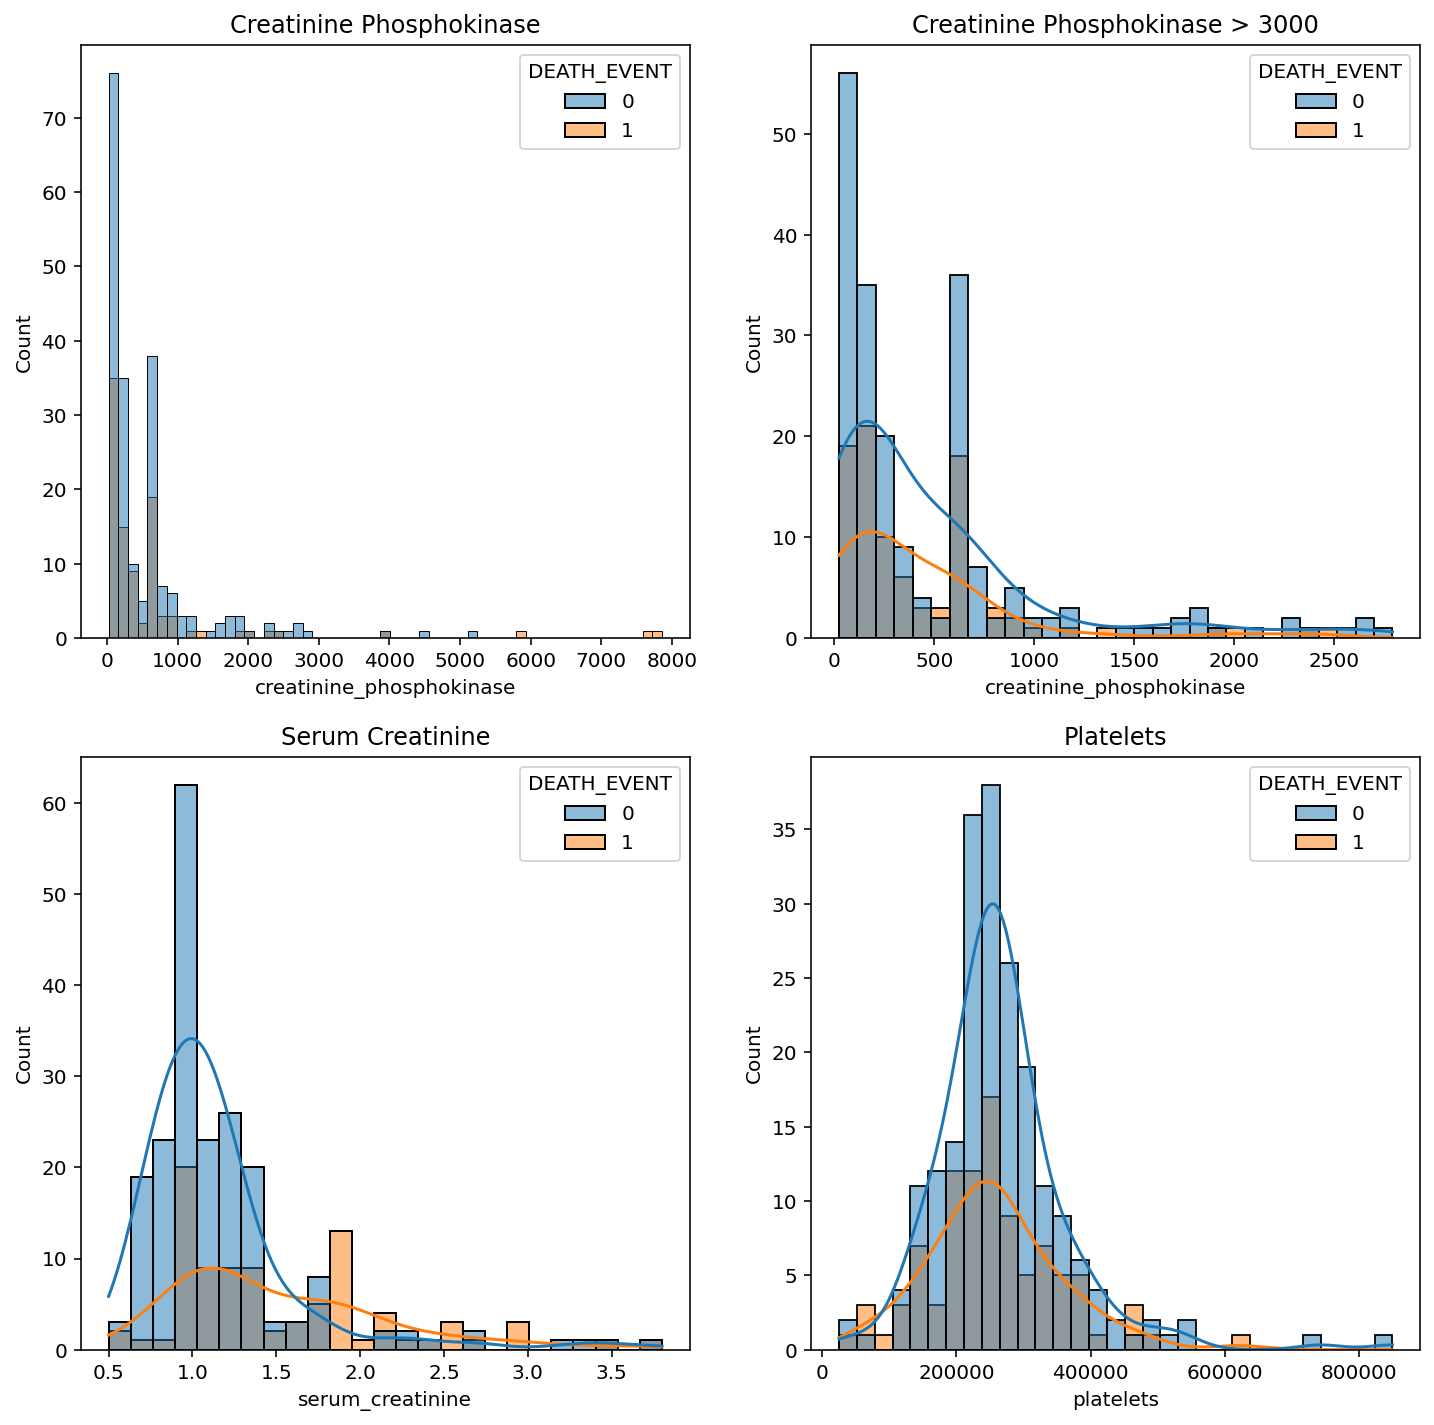

In [25]:
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.title('Creatinine Phosphokinase')
sns.histplot(data = df, x = 'creatinine_phosphokinase', hue = 'DEATH_EVENT')

plt.subplot(2,2,2)
plt.title('Creatinine Phosphokinase > 3000')
sns.histplot(data = df.loc[df['creatinine_phosphokinase']<3000], x = 'creatinine_phosphokinase',
             hue = 'DEATH_EVENT', bins = 30, kde=True)
plt.subplot(2,2,3)
plt.title('Serum Creatinine')
sns.histplot(data = df.loc[df['serum_creatinine']<4], x = 'serum_creatinine', hue = 'DEATH_EVENT', kde=True )

plt.subplot(2,2,4)
plt.title('Platelets')
sns.histplot(data = df, x = 'platelets', hue = 'DEATH_EVENT', kde=True)

plt.show()

$ \rightarrow \textbf{Creatine Phosphokinase data has outliers (over 3000)}$  

<Figure size 360x360 with 0 Axes>

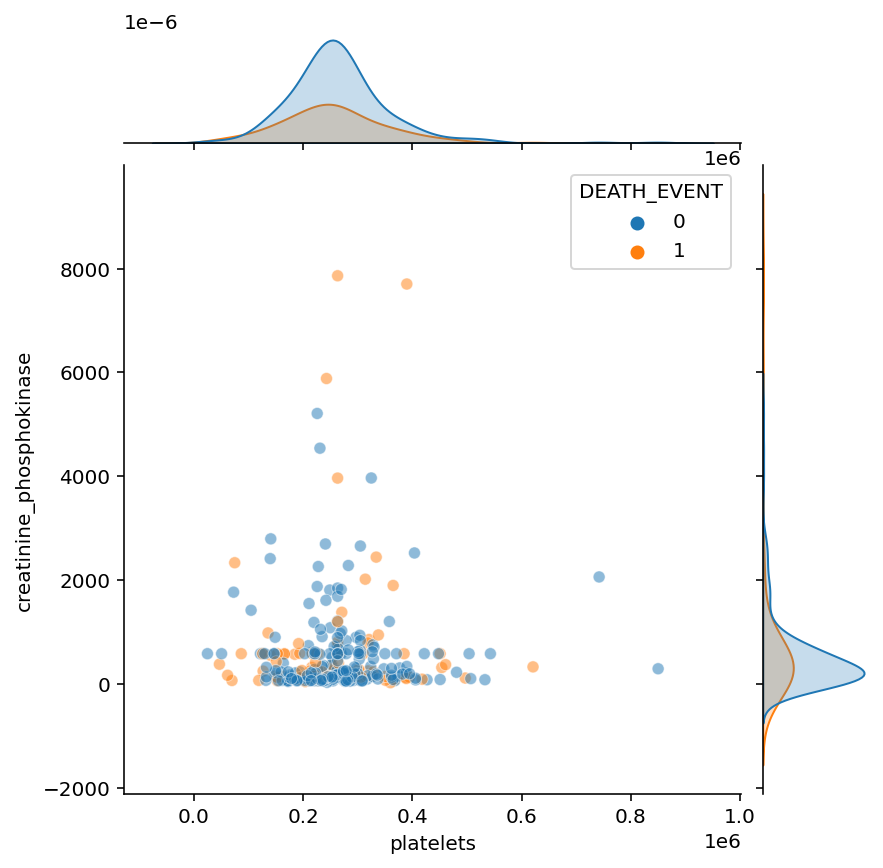

In [26]:
plt.figure(figsize=(5,5))
sns.jointplot(data=df, x = 'platelets', y = 'creatinine_phosphokinase',
              hue='DEATH_EVENT', alpha=0.5)
plt.show()

$ \rightarrow \textbf{No clear insight can be obtained from 'platelets' and 'creatinine_phosphokinase' data}$  

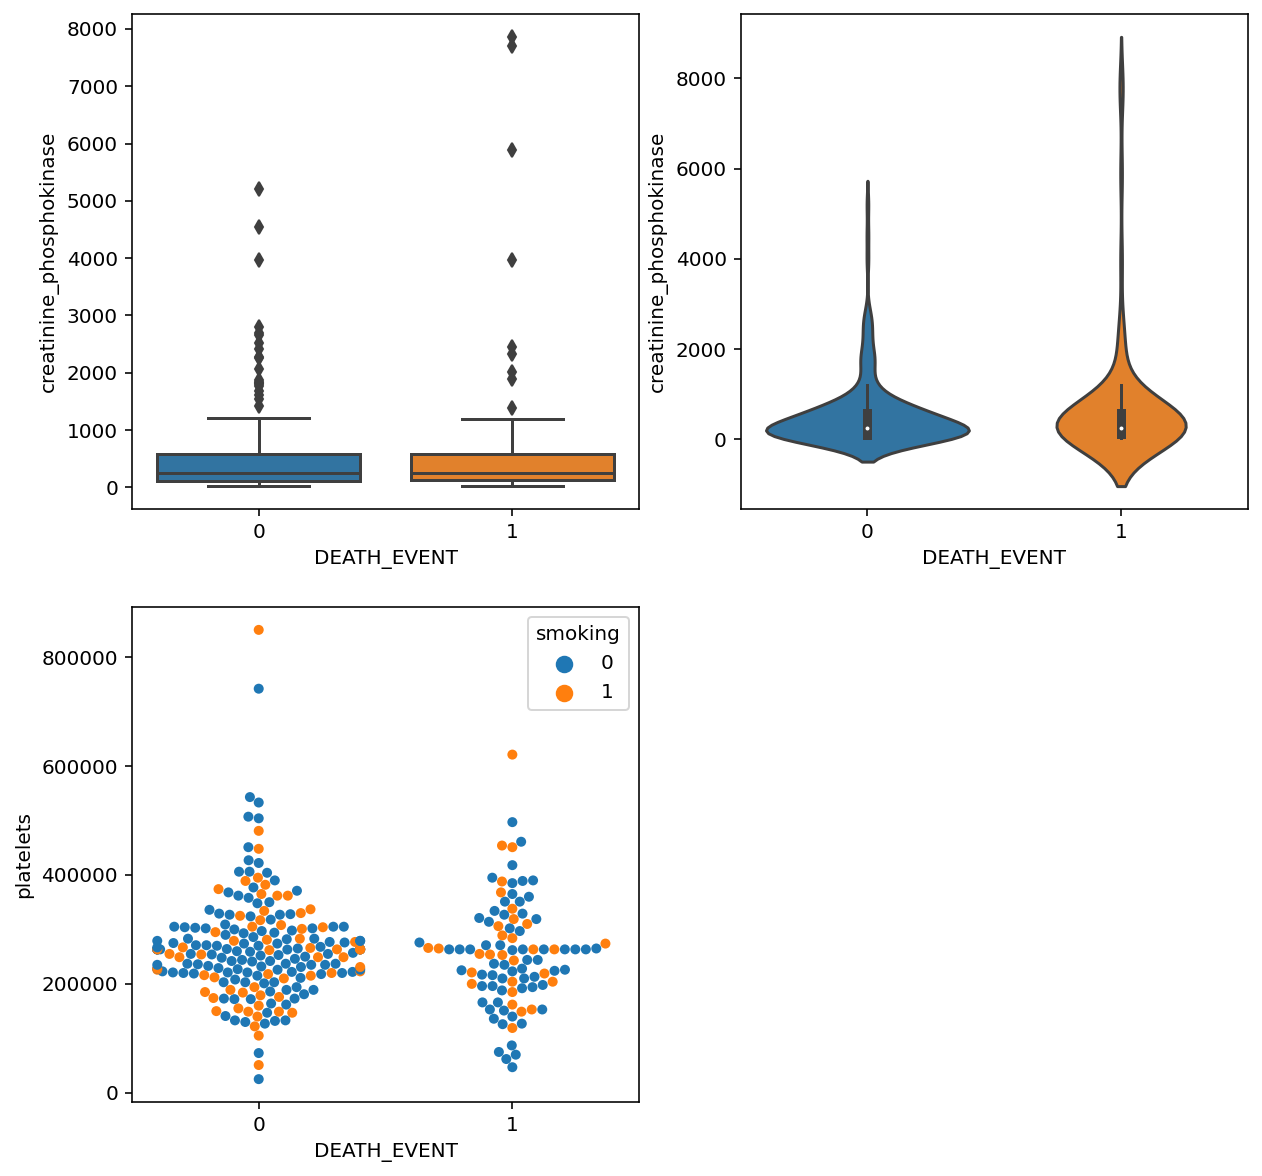

In [27]:
# ---test
plt.figure(figsize=(10, 10))

plt.subplot(2,2,1)
sns.boxplot(data = df, x = 'DEATH_EVENT', y = 'creatinine_phosphokinase' )

plt.subplot(2,2,2)
sns.violinplot(data = df, x = 'DEATH_EVENT', y = 'creatinine_phosphokinase' )

plt.subplot(2,2,3)
sns.swarmplot(data = df, x = 'DEATH_EVENT', y = 'platelets', hue='smoking')

plt.show()

In [28]:
import plotly.figure_factory as ff

hist_data = [df['age'].values]
group_labels = ['age']

fig = ff.create_distplot(hist_data, group_labels)
fig.update_layout(title_text='Age Distribution Plot')

fig.show()

$\rightarrow$ Age wise 40 to 80 the spread is **High**  
$\rightarrow$ Less than 40 age and higher than 80 age people are **very low**

In [29]:
import plotly.express as px

fig = px.box(df, x='sex', y='age', points='all')
fig.update_layout(title_text="Gender wise Age Spread - Male = 1 Female =0")
fig.show()

In [30]:
male = df[df['sex']==1]
female = df[df['sex']==0]

male_survi = male[df['DEATH_EVENT']==0]
male_not = male[df["DEATH_EVENT"]==1]
female_survi = female[df["DEATH_EVENT"]==0]
female_not = female[df["DEATH_EVENT"]==1]

labels = ['Male - Survived','Male - Not Survived', "Female -  Survived", "Female - Not Survived"]
values = [len(male[df['DEATH_EVENT']==0]), len(male[df['DEATH_EVENT']==1]),
          len(female[df['DEATH_EVENT']==0]), len(female[df['DEATH_EVENT']==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(title_text='Analysis on Survival - Gender')
fig.show()

In [31]:
surv = df[df['DEATH_EVENT']==0]['age']
not_surv = df[df['DEATH_EVENT']==1]['age']
hist_data = [surv, not_surv]
group_labels = ['Survived', 'Not Survived']
fig = ff.create_distplot(hist_data, group_labels, bin_size = 0.5)
fig.update_layout(title_text="Analysis in Age on Survival Status")
fig.show()

$\rightarrow$ Survival is high on 40 to 70  
$\rightarrow$ The spread of Not Survival is going through all ages.

In [32]:
fig = px.violin(df, x='sex', y='age', color='DEATH_EVENT', box=True, 
                points="all",
                hover_data=df.columns)
fig.update_layout(title_text="Analysis in Age and Sex on Survival Status")
fig.show()

### Age Report
- Survival spread is high in age's flow of 40 to 70
- The Survival is high for both male between 50 to 60 and female's age between 60 to 70 respectively

In [33]:
display(HTML("<style>div.output_scroll { height: 40em; }</style>")) ## Control to Ouput height size

fig = go.Figure()

fig.add_trace(go.Violin(x=df['smoking'][df['DEATH_EVENT']==1],
                        y=df['age'][df['DEATH_EVENT']==1],
                        legendgroup='Not Survived',
                        scalegroup='Not Survived',
                        name='Not survived',
                        side='negative',
                        pointpos=-1.5,
                        line_color='blue')
             )

customdata = np.stack((df['age'][df['DEATH_EVENT']==0],
                       df['anaemia'][df['DEATH_EVENT']==0],
                       df['creatinine_phosphokinase'][df['DEATH_EVENT']==0],
                       df['diabetes'][df['DEATH_EVENT']==0],
                       df['ejection_fraction'][df['DEATH_EVENT']==0],
                       df['high_blood_pressure'][df['DEATH_EVENT']==0],
                       df['platelets'][df['DEATH_EVENT']==0],
                       df['serum_creatinine'][df['DEATH_EVENT']==0],
                       df['serum_sodium'][df['DEATH_EVENT']==0],
                       df['sex'][df['DEATH_EVENT']==0],
                       df['smoking'][df['DEATH_EVENT']==0],
                       df['time'][df['DEATH_EVENT']==0],
                      ), axis=-1)

fig.add_trace(go.Violin(x=df['smoking'][df['DEATH_EVENT']==0],
                        y=df['age'][df['DEATH_EVENT']==0],
                        
                        legendgroup='Survived',
                        scalegroup='Survived',
                        name='Survived',
                        side='positive',
                        pointpos=1.5, # where to position points
                        line_color='red',
                        
                        customdata=customdata,
                        hovertemplate="<b>age: %{customdata[0]}</b><br>" +
                        "<b>anaemia: %{customdata[1]}</b><br>" +
                        "<b>creatinine_phosphokinase: %{customdata[2]}</b><br>" +
                        "<b>diabetes: %{customdata[3]}</b><br>" +
                        "<b>ejection_fraction: %{customdata[4]}</b><br>" +
                        "<b>high_blood_pressure: %{customdata[5]}</b><br>" +
                        "<b>platelets: %{customdata[6]}</b><br>" +
                        "<b>serum_creatinine: %{customdata[7]}</b><br>" +
                        "<b>serum_sodium: %{customdata[8]}</b><br>" +
                        "<b>sex: %{customdata[9]}</b><br>" +
                        "<b>smoking: %{customdata[10]}</b><br>" +
                        "<b>time: %{customdata[0]}</b><br>"
                       )
             )
    
fig.update_traces(
    box_visible=True,
    meanline_visible=False,
    points='all',
    )

fig.update_layout(
    title_text="Analysis in Age and Smoking on Survival Status",
    violinmode='overlay',
    xaxis_title="smoking",
    yaxis_title="age",
    xaxis = dict(
        tickmode='array',
        tickvals=[0, 1],
        ticktext = ['Non-Smoking', 'Smoking']

        )
    )
fig.show()

In [34]:
fig = px.violin(df, x='diabetes', y='age', color='DEATH_EVENT', box=True, 
                points="all",
                hover_data=df.columns)
fig.update_layout(title_text="Analysis in Age and Diabetes on Survival Status")
fig.show()

In [35]:
fig = px.histogram(df, x='creatinine_phosphokinase', color='DEATH_EVENT', 
                   marginal='violin', hover_data=df.columns)
fig.show()

In [36]:
fig = px.histogram(df, x='ejection_fraction', color='DEATH_EVENT', 
                   marginal='violin', hover_data=df.columns)
fig.show()

In [37]:
surv = df[df['DEATH_EVENT']==0]['serum_sodium']
not_surv = df[df['DEATH_EVENT']==1]['serum_sodium']
hist_data=[surv, not_surv]
group_labels=['Survived', 'Not Survived']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(title_text='Analysis in Serum Sodium on Survival Status')
fig.show()

In [38]:
diabetes_no = df[df['diabetes']==0]
diabetes_yes = df[df['diabetes']==1]

diabetes_no_surv = diabetes_no[df['DEATH_EVENT']==0]
diabetes_yes_surv = diabetes_yes[df['DEATH_EVENT']==0]
diabetes_no_not_surv = diabetes_no[df['DEATH_EVENT']==1]
diabetes_yes_not_surv = diabetes_yes[df['DEATH_EVENT']==1]

labels = ['Diabetes Yes - Survived','Diabetes Yes - Not Survived',
          'Diabetes NO - Survived', 'Diabetes NO - Not Survived']
values = [len(diabetes_yes_surv), len(diabetes_yes_not_surv), len(diabetes_no_surv), len(diabetes_no_not_surv)]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(title_text='Analysis on Survival - Diabetes')
fig.show()

- From above pie charts we can conclude that in our dataset diabetes from 174 of Non Diabetes person 118 are survived and 56 are not survived and
- From 125 Diabetes person 85 are survived, while 40 are not survived.

In [39]:
profile = ProfileReport(df, title="Profiling Report",
                        dataset={"description":"This profileing report was generated for Jaehwan Jeong",
                                 "copyright_holder":"Jaehwan Jeong",
                                 "copyright_year":"2022"},
                        explorative=True)
profile.to_file("Profile_HeartFailure.html")

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

- **Dataset Statistics**
    - Variables = 13
    - Observations = 299
    - Missing cells = 0
    - Duplicate rows = 0
- **Variable types**
    - Numerical = 7
    - Boolean = 6

$\begin{aligned}
    &\textbf{피어슨상관계수} = \cfrac{\textbf{공분산}}{\textbf{표준편차}\boldsymbol{\cdot}\textbf{표준편차}} \\
    \rightarrow \quad &r_{XY} = \cfrac{
                \sum\limits_i ^n{(X_i - \overline X)(Y_i - \overline Y)}
                 }{
                \sqrt{\sum\limits_i ^n{(X_i - \overline X)^2}}
                \sqrt{\sum\limits_i ^n{(Y_i - \overline Y)^2}}
                 } \\
     &\bullet \quad \text{PCC란 두 변수 X와 Y 간의 선형 상관 관계를 계량화한 수치} \\
     &\bullet \quad \text{Cauchy-Schwarz Inequality에 의해 -1~1 사이의 값을 가짐} \\
     &\bullet \quad \text{+1: 완벽한 양의 선형 상관 관계, 하나가 증가할 때 다른 하나도 함께 증가} \\
     &\bullet \quad \text{0 : 상관관계 없음} \\
     &\bullet \quad \text{-1: 완벽한 음의 선형 상관 관계, 하나가 증가할 때 다른 하나는 감소}
\end{aligned}$

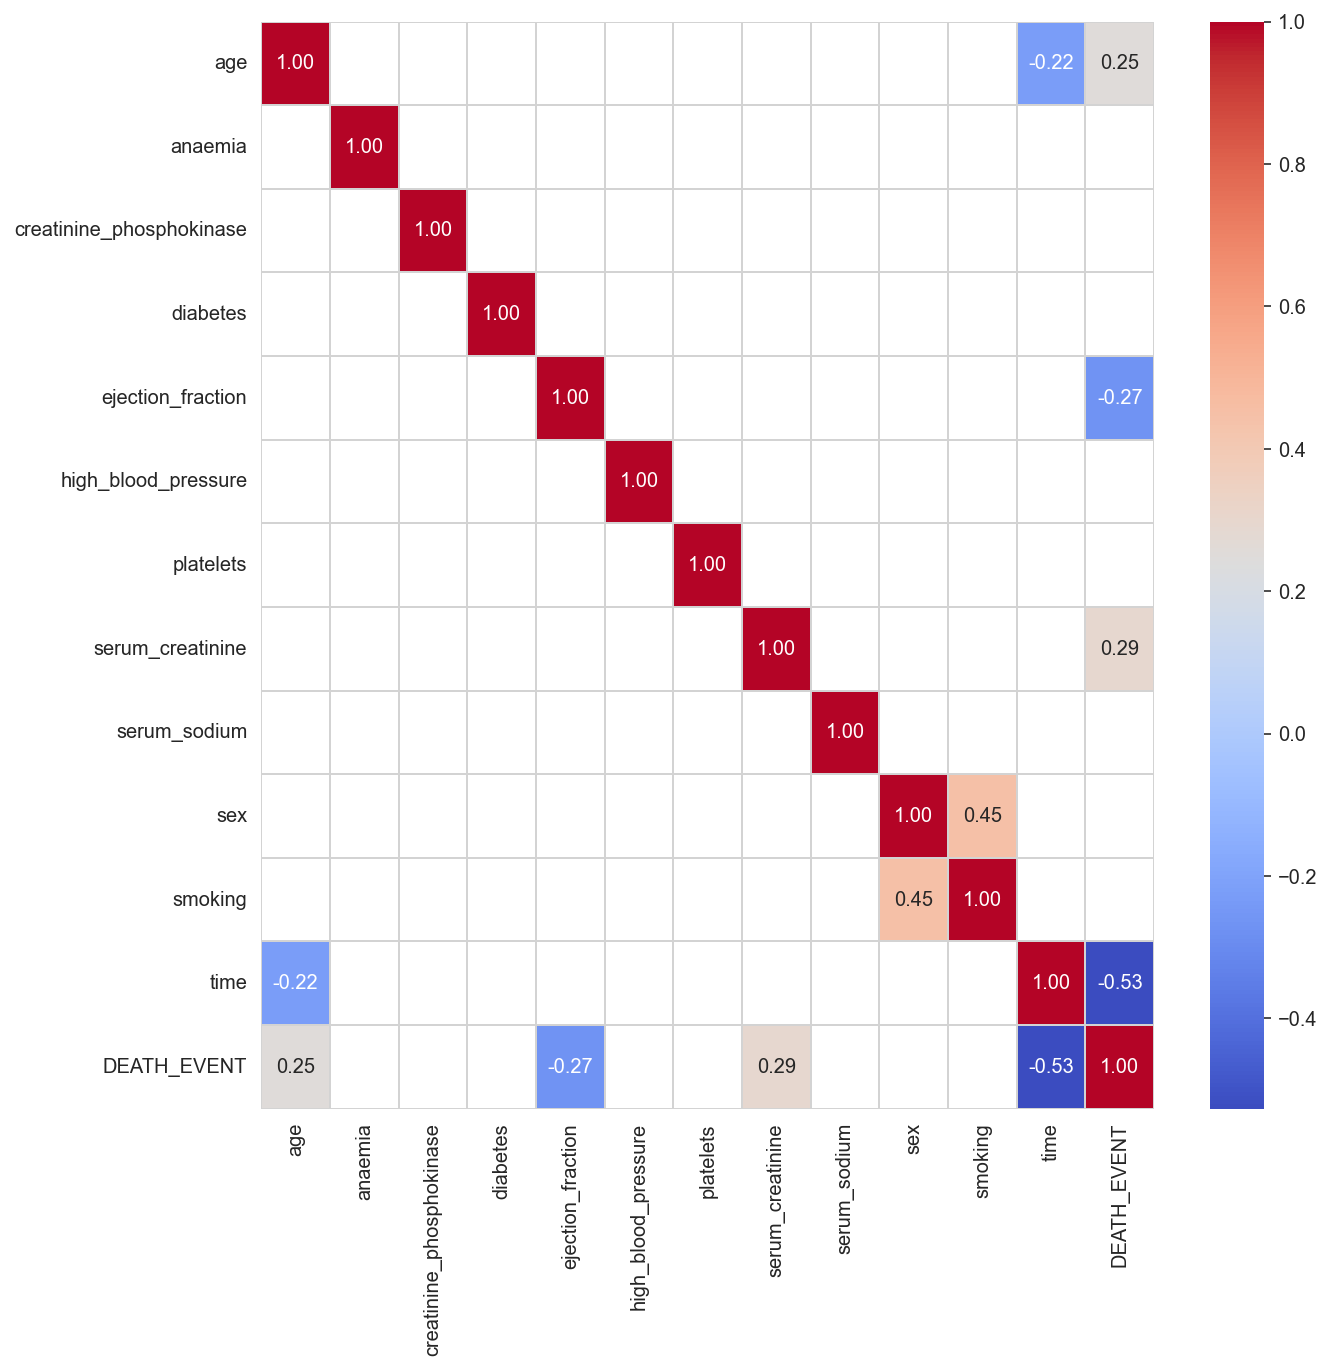

In [40]:
plt.figure(figsize=(10, 10))
sns.set_style('whitegrid', {"axes.facecolor":".0"})
threshold = 0.2
mask = df.corr().where((abs(df.corr())>=threshold)).isna()

sns.heatmap(data = df.corr(), # *default: Pearson Correlation
            mask = mask,
            cmap = "coolwarm",
            annot = True, # write the data value in each cell
            fmt='.2f', # string formatting code to use when adding annotation
            linewidths = 0.2,
            linecolor = 'lightgrey').set_facecolor('white')
plt.show()

$\rightarrow \textbf{'age', 'ejection_fraction', 'serum_creatinine' data look useful for input}$